# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [26]:
# import numpy and pandas
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import f_oneway

# Challenge 1 - Exploring the Data

In this challenge, we will examine all salaries of employees of the City of Chicago. We will start by loading the dataset and examining its contents.

In [2]:
# Your code here:
ds = pd.read_csv('Current_Employee_Names__Salaries__and_Position_Titles.csv')

Examine the `salaries` dataset using the `head` function below.

In [3]:
# Your code here:

ds.head()

,Name,Job Titles,Department,Full or Part-Time,Salary or Hourly,Typical Hours,Annual Salary,Hourly Rate
0,"AARON, JEFFERY M",SERGEANT,POLICE,F,Salary,NaN,101442.0,NaN
1,"AARON, KARINA",POLICE OFFICER (ASSIGNED AS DETECTIVE),POLICE,F,Salary,NaN,94122.0,NaN
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,F,Salary,NaN,101592.0,NaN
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,F,Salary,NaN,110064.0,NaN
4,"ABASCAL, REECE E",TRAFFIC CONTROL AIDE-HOURLY,OEMC,P,Hourly,20.0,NaN,19.86


We see from looking at the `head` function that there is quite a bit of missing data. Let's examine how much missing data is in each column. Produce this output in the cell below

In [6]:
# Your code here:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33183 entries, 0 to 33182
Data columns (total 8 columns):
Name                 33183 non-null object
Job Titles           33183 non-null object
Department           33183 non-null object
Full or Part-Time    33183 non-null object
Salary or Hourly     33183 non-null object
Typical Hours        8022 non-null float64
Annual Salary        25161 non-null float64
Hourly Rate          8022 non-null float64
dtypes: float64(3), object(5)
memory usage: 2.0+ MB


Let's also look at the count of hourly vs. salaried employees. Write the code in the cell below

In [15]:
# Your code here:
ds['count'] = np.where(ds['Salary or Hourly'] == 'Salary', 1, 0)
print('Salary count', ds['count'].sum())

Salary count 25161


In [16]:
Hourly = ds['Salary or Hourly'].count() - ds['count'].sum()
print('Hourly count', ds['Salary or Hourly'].count() - ds['count'].sum())

Hourly count 8022


What this information indicates is that the table contains information about two types of employees - salaried and hourly. Some columns apply only to one type of employee while other columns only apply to another kind. This is why there are so many missing values. Therefore, we will not do anything to handle the missing values.

There are different departments in the city. List all departments and the count of employees in each department.

In [27]:
# Your code here:
ds.pivot_table(index=["Department"],  aggfunc={'Name':'count'})

,Name
Department,
ADMIN HEARNG,39
ANIMAL CONTRL,81
AVIATION,1629
BOARD OF ELECTION,107
BOARD OF ETHICS,8
BUDGET & MGMT,46
BUILDINGS,269
BUSINESS AFFAIRS,171
CITY CLERK,84


# Challenge 2 - Hypothesis Tests

In this section of the lab, we will test whether the hourly wage of all hourly workers is significantly different from $30/hr. Import the correct one sample test function from scipy and perform the hypothesis test for a 95% two sided confidence interval.

In [52]:
ttest_1samp(ds['Hourly Rate'].dropna(), 30)

Ttest_1sampResult(statistic=20.6198057854942, pvalue=4.3230240486229894e-92)

In [50]:
#H0: the wage of the workers is not significalty different (over 95%) from 30 dollar/hr
#H1: the wage of the workers is significalty different (over 95%) from 30 dollar/hr
    
ds_hourly = ds['Hourly Rate'].dropna()
ds_hourly.describe()

count    8022.000000
mean       32.788558
std        12.112573
min         2.650000
25%        21.200000
50%        35.600000
75%        40.200000
max       109.000000
Name: Hourly Rate, dtype: float64

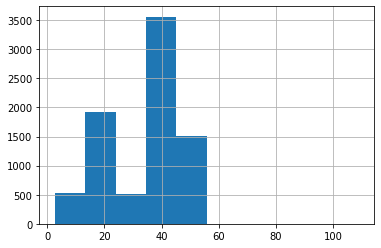

In [33]:
ds_hourly.hist()

In [94]:
from scipy.stats import norm
from scipy import stats
stats.norm.interval(0.95, loc=32.788558, scale=12.112573)


(9.048351159887726, 56.528764840112274)

We are also curious about salaries in the police force. The chief of police in Chicago claimed in a press briefing that salaries this year are higher than last year's mean of $86000/year a year for all salaried employees. Test this one sided hypothesis using a 95% confidence interval.

Hint: A one tailed test has a p-value that is half of the two tailed p-value. If our hypothesis is greater than, then to reject, the test statistic must also be positive.

In [43]:
# Your code here:
dsp = ds.loc[ds['Department'] == 'POLICE']
Police_yearly = dsp['Annual Salary'].dropna()
Police_yearly.describe()

stats.norm.interval(0.95, loc=86486.414503, scale=18272.228294)

(50673.505129466255, 122299.32387653376)

In [53]:
ttest_1samp(Police_yearly, 86000)

Ttest_1sampResult(statistic=3.081997005712994, pvalue=0.0020603403550965137)

In [44]:
Police_yearly.describe()

count     13404.000000
mean      86486.414503
std       18272.228294
min       38376.000000
25%       84054.000000
50%       90024.000000
75%       94524.000000
max      260004.000000
Name: Annual Salary, dtype: float64

Using the `crosstab` function, find the department that has the most hourly workers. 

In [47]:
# Your code here:
datacrosstab = pd.crosstab(ds['Department'],  
                            ds['Salary or Hourly'], 
                                margins = False) 
#datacrosstab['Hourly'].max()
datacrosstab['Hourly']

"""STREETS & SAN"""

Department
ADMIN HEARNG                0
ANIMAL CONTRL              19
AVIATION                 1082
BOARD OF ELECTION           0
BOARD OF ETHICS             0
BUDGET & MGMT               2
BUILDINGS                   0
BUSINESS AFFAIRS            7
CITY CLERK                  0
CITY COUNCIL               64
COMMUNITY DEVELOPMENT       4
COPA                        0
CULTURAL AFFAIRS            7
DISABILITIES                0
DoIT                        0
FAMILY & SUPPORT          287
FINANCE                    44
FIRE                        2
GENERAL SERVICES          765
HEALTH                      3
HUMAN RELATIONS             0
HUMAN RESOURCES             4
INSPECTOR GEN               0
LAW                        40
LICENSE APPL COMM           0
MAYOR'S OFFICE              8
OEMC                     1273
POLICE                     10
POLICE BOARD                0
PROCUREMENT                 2
PUBLIC LIBRARY            299
STREETS & SAN            1862
TRANSPORTN                725

The workers from the department with the most hourly workers have complained that their hourly wage is less than $35/hour. Using a one sample t-test, test this one-sided hypothesis at the 95% confidence level.

In [60]:
# Your code here:
dsSS = ds.loc[ds['Department'] == 'STREETS & SAN']
SSS = dsp['Hourly Rate'].dropna()
SSS.describe()


ttest_1samp(SSS, 35)

Ttest_1sampResult(statistic=-825.6069638307035, pvalue=2.8568487331366325e-23)

In [61]:
SSS.describe()

count    10.000000
mean      9.384000
std       0.098116
min       9.270000
25%       9.270000
50%       9.460000
75%       9.460000
max       9.460000
Name: Hourly Rate, dtype: float64

In [62]:
stats.norm.interval(0.95, loc=9.384000, scale=0.098116)

(9.191696173692868, 9.576303826307132)

# Challenge 3: To practice - Constructing Confidence Intervals

While testing our hypothesis is a great way to gather empirical evidence for accepting or rejecting the hypothesis, another way to gather evidence is by creating a confidence interval. A confidence interval gives us information about the true mean of the population. So for a 95% confidence interval, we are 95% sure that the mean of the population is within the confidence interval. 
).

To read more about confidence intervals, click [here](https://en.wikipedia.org/wiki/Confidence_interval).


In the cell below, we will construct a 95% confidence interval for the mean hourly wage of all hourly workers. 

The confidence interval is computed in SciPy using the `t.interval` function. You can read more about this function [here](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.t.html).

To compute the confidence interval of the hourly wage, use the 0.95 for the confidence level, number of rows - 1 for degrees of freedom, the mean of the sample for the location parameter and the standard error for the scale. The standard error can be computed using [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.sem.html) function in SciPy.

In [68]:
# Your code here:
stats.sem(ds['Hourly Rate'].dropna(), axis=None, ddof=0)

0.1352284271240131

In [69]:
ds['Hourly Rate'].describe()

count    8022.000000
mean       32.788558
std        12.112573
min         2.650000
25%        21.200000
50%        35.600000
75%        40.200000
max       109.000000
Name: Hourly Rate, dtype: float64

In [70]:
stats.norm.interval(0.95, loc=32.788558, scale=0.1352284271240131)

(32.52351515315094, 33.053600846849065)

In [71]:
stats.norm.interval(0.95, loc=32.788558, scale= 12.112573)

(9.048351159887726, 56.528764840112274)

Now construct the 95% confidence interval for all salaried employeed in the police in the cell below.

In [92]:
PDSS = ds.loc[ds['Department'] == 'POLICE'] 
PDSSS = PDSS['Annual Salary'].dropna()
PDSSS.describe()

count     13404.000000
mean      86486.414503
std       18272.228294
min       38376.000000
25%       84054.000000
50%       90024.000000
75%       94524.000000
max      260004.000000
Name: Annual Salary, dtype: float64

In [93]:
stats.norm.interval(0.95, loc=86486.414503, scale= 18272.228294)

(50673.505129466255, 122299.32387653376)

# Bonus Challenge - Hypothesis Tests of Proportions

Another type of one sample test is a hypothesis test of proportions. In this test, we examine whether the proportion of a group in our sample is significantly different than a fraction. 

You can read more about one sample proportion tests [here](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/SAS/SAS6-CategoricalData/SAS6-CategoricalData2.html).

In the cell below, use the `proportions_ztest` function from `statsmodels` to perform a hypothesis test that will determine whether the number of hourly workers in the City of Chicago is significantly different from 25% at the 95% confidence level.

In [ ]:
# Your code here:

